# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [251]:
#!pip install statsmodels

In [304]:
# import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [253]:
# Your code here:
df = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


Examine the `salaries` dataset using the `head` function below.

In [255]:
# Your code here:
df.head(8)


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
5,"ABBASI, CHRISTOPHER",STAFF ASST TO THE ALDERMAN,CITY COUNCIL,F,Salary,NaN,50436.0,NaN
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [256]:
# Your code here:
df.columns


Index(['Name', 'Job Titles', 'Department', 'Full or Part-Time',
       'Salary or Hourly', 'Typical Hours', 'Annual Salary', 'Hourly Rate'],
      dtype='object')

In [257]:
#Nulos en las columnas 'Typocal Hours, Hourlu Rate y Annual Salary'
df['Typical Hours'].isnull().sum()

25161

In [258]:
df['Annual Salary'].isnull().sum()

8022

In [259]:
df['Hourly Rate'].isnull().sum()

25161

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [260]:
# Frequency of type of employ: Salary or Hourly
df['Salary or Hourly'].isnull().sum()

0

In [261]:
freq= df['Salary or Hourly'].value_counts()

In [262]:
print(freq)

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64


Text(0.5, 1.0, 'Frequency of type of employ: Salary or Hourly')

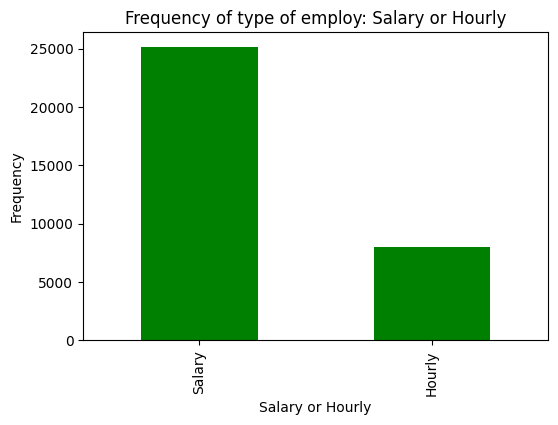

In [263]:
freq.plot(kind="bar",figsize=(6,4), color="green")
plt.xlabel("Salary or Hourly")
plt.ylabel("Frequency")
plt.title("Frequency of type of employ: Salary or Hourly")


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [264]:
# departments and employees
departments = df['Department'].value_counts().reset_index()\
            .rename(columns={'index': 'Department', 'Department': 'Count'})\
            .sort_values(by='Count', ascending=False)
departments.head(4)

,Department,Count
0,POLICE,13414
1,FIRE,4641
2,STREETS & SAN,2198
3,OEMC,2102


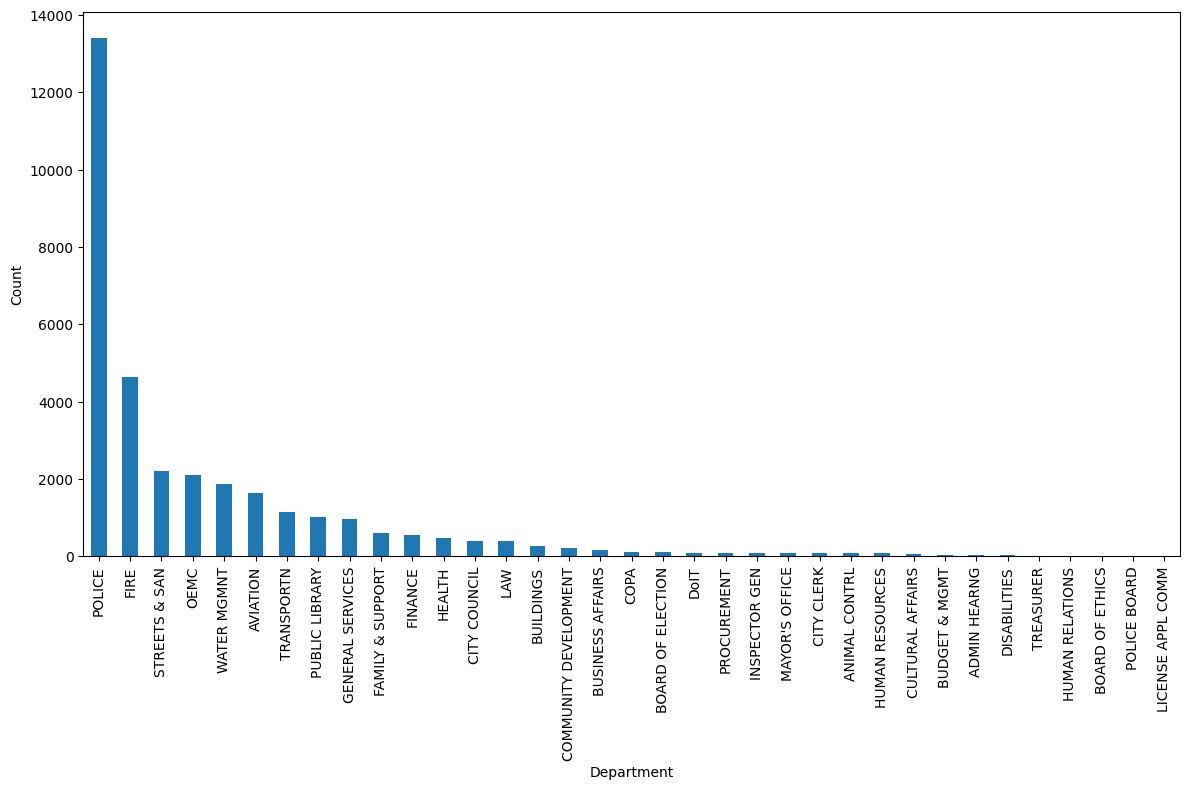

In [265]:
# Distribución de empleados por departamento.

ax = departments.plot.bar(figsize=(12, 8), legend=False, x='Department', y='Count')
ax.set_xlabel('Department')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

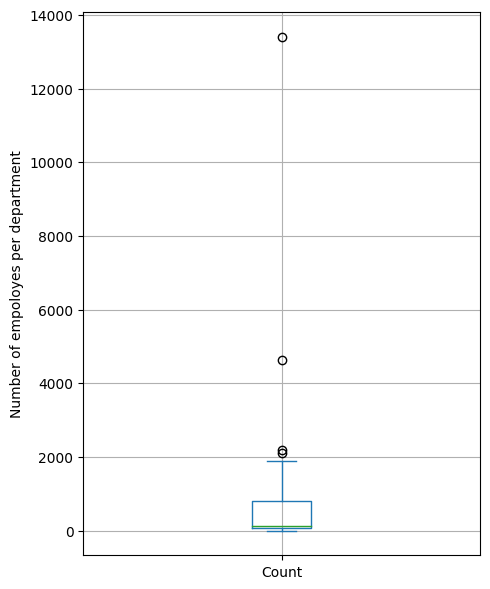

In [266]:
data = departments['Count']
ax = data.plot.box(figsize=(5, 6))
ax.set_ylabel('Number of empoloyes per department')
plt.tight_layout()
plt.grid()
plt.show()
#COMO CONCLUSIÓN, LA MAYORÍA DE LOS DEPARTAMENTOS TIENEN MENOS DE 1000 EMPLEADOS Y HAY DOS OUTLIERS

In [267]:
#departments.head(3)

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [268]:
#Elimino del DF original las filas con valor NAN en la columna 'Typical Hours'
#df_test= df.dropna(subset=['Typical Hours'])
#df_test.info()
df_test = df[df['Salary or Hourly']=='Hourly']

In [269]:
df_test.head(5)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68


In [270]:
#Hipótesis 
#H0: el salario por hora de todos los trabajadores es significativamente diferente de $30/hr.
#H1: el salario por hora de todos los trabajadores no es significativamente diferente de $30/hr. 

In [271]:
#se calcula la media de cada muestra de tamaño 31. Lo repito 8022 veces que es el nº de filas.
df_test_sample= pd.Series([df_test['Hourly Rate'].sample(31).mean() for _ in range(8022)])
df_test_sample

0       33.227419
1       34.123226
2       30.377097
3       33.796129
4       35.230000
          ...    
8017    34.969677
8018    33.633548
8019    31.931935
8020    31.075484
8021    33.486129
Length: 8022, dtype: float64

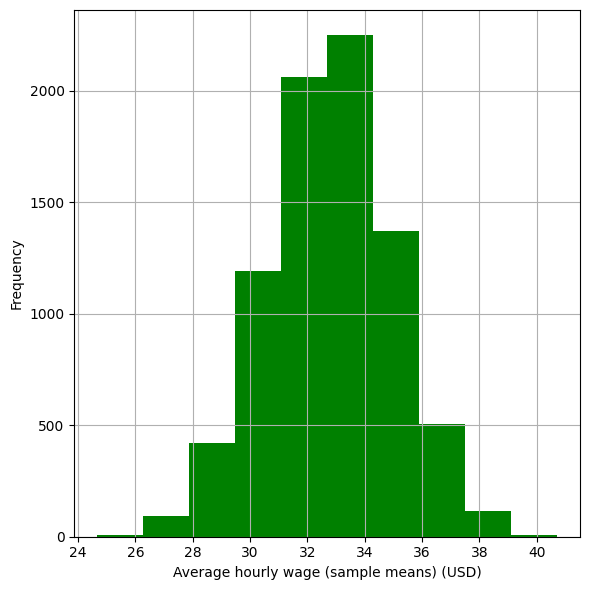

In [272]:
#Lo muestro en un gráfico
ax = df_test_sample.plot.hist(figsize=(6, 6), color = "green")
ax.set_xlabel('Average hourly wage (sample means) (USD)')
plt.tight_layout()
plt.grid()
#Se deduce que la media es mayor a 30€ por hora.

In [273]:
#DUDAS DE LO ANTERIOR:
#He hecho esto, pero realmente no sé si es necesario.
#¿Para qué necesito visualizar la media de un muestreo?

In [274]:
#Hipótesis 
#H0: el salario por hora de todos los trabajadores es de $30/hr.
#H1: el salario por hora de todos los trabajadores es significativamente diferente a $30/hr. 

In [275]:
# Test parameters 
hypothesis_mean = 30
sample_mean = df_test['Hourly Rate'].mean()
alpha = 0.05
print(f'Hypothesis mean: {hypothesis_mean} USD',
      f'\nSample mean: {sample_mean} USD',
      f'\nProbability threshold: {alpha}')

Hypothesis mean: 30 USD 
Sample mean: 32.78855771628024 USD 
Probability threshold: 0.05


In [276]:
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(df_test['Hourly Rate'], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')


Z_score: 20.6198057854942 
p-value: 1.8228873859286195e-94


In [277]:
#CONCLUSIÓN
#El p-value está por debajo de alfa por lo que rechazo:
#H0: el salario por hora de todos los trabajadores es de $30/hr.
#H1: el salario por hora de todos los trabajadores es significativamente diferente a $30/hr.

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [278]:
# Your code here:
#H0:el salario medio del año pasado era mayor al de este año.
#H1: el salario medio de este año es mayor al del año pasado

In [279]:
df['Annual Salary'].unique()

array([101442.,  94122., 101592., ..., 116604.,  62976.,  64056.])

In [280]:
df_police= df[(df['Department']=='POLICE')&(df['Annual Salary'].notnull())].reset_index()

In [281]:
df_police.head(6)

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
3,11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
4,12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN
5,14,"ABDELMAJEID, AZIZ",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN


In [282]:
media_anterior= 86000
sample_mean = df_police['Annual Salary'].mean()
alpha = 0.05
print(f'Hypothesis mean: {media_anterior} USD',
      f'\nSample mean: {sample_mean} USD',
      f'\nProbability threshold: {alpha}')

Hypothesis mean: 86000 USD 
Sample mean: 86486.41450313339 USD 
Probability threshold: 0.05


In [283]:
# Z-test (the probability that the sample mean is not within the 95% of the population mean)

Z_score, p_value = ztest(df_police['Annual Salary'], value=media_anterior)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 3.081997005712994 
p-value: 0.002056169057509571


In [284]:
#RESPUESTA:
#En este caso dado que el p-value es menor a 0.05, también rechazaríamos la hipótesis nula.  
#H0:el salario medio del año pasado era mayor al de este año.
#Aceptaríamos la hipótesis alternativa
#H1: el salario medio de este año es mayor al del año pasado

#DUDA: me surge la duda de si en este caso podríamos suponer un error de tipo 1 dado que, el enunciado dice:
#todos los salarios superan la media del año pasado y no es real porque en el DF hay salarios menor a 86000.absabs

In [285]:
df_police_sample= pd.Series([df_police['Annual Salary'].sample(31).mean() for _ in range(5000)])
df_police_sample

0       87799.741935
1       92981.419355
2       86313.483871
3       90863.225806
4       87453.290323
            ...     
4995    85090.451613
4996    85671.096774
4997    85985.419355
4998    80613.483871
4999    80197.354839
Length: 5000, dtype: float64

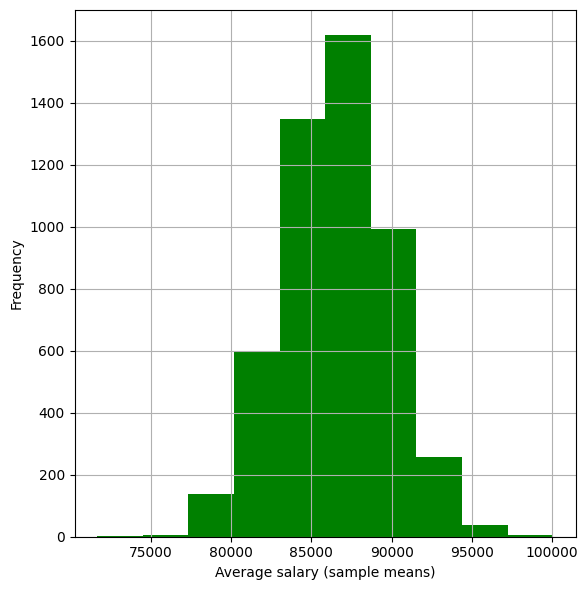

In [286]:
#Lo muestro en un gráfico
ax = df_police_sample.plot.hist(figsize=(6, 6), color = "green")
ax.set_xlabel('Average salary (sample means)')
plt.tight_layout()
plt.grid()
#Se observa, que hay salarios por debajo de 86000.

Using the `crosstab` function, find the department that has the most hourly workers. 

In [287]:
department_crosstable = pd.crosstab(index=df[df['Salary or Hourly']=='Hourly']['Department'],\
                        columns='count', margins=True).sort_values(by='count', ascending=False)

department_crosstable = department_crosstable.rename(columns={'index': 'Departmento', 'count': 'nº trabajadores'})\
                        .reset_index()
department_crosstable = department_crosstable.drop(columns=['All']) #Elimino columna "all"
#department_crosstable = department_crosstable.drop([0]) #Elimino 1ª fila porque es "all"

In [288]:
department_crosstable

col_0,Department,nº trabajadores
0,All,8022
1,STREETS & SAN,1862
2,WATER MGMNT,1513
3,OEMC,1273
4,AVIATION,1082
5,GENERAL SERVICES,765
6,TRANSPORTN,725
7,PUBLIC LIBRARY,299
8,FAMILY & SUPPORT,287
9,CITY COUNCIL,64


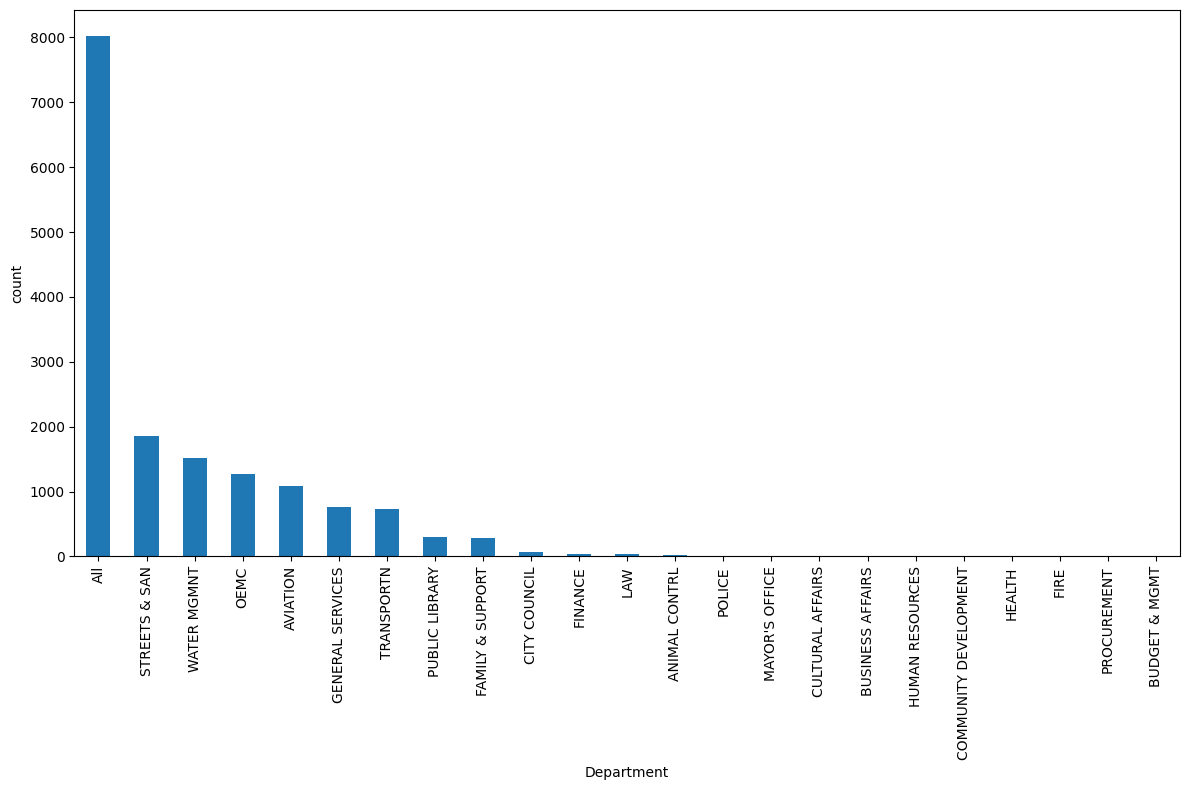

In [289]:
ax = department_crosstable.plot.bar(figsize=(12, 8), legend=False, x='Department', y='nº trabajadores')
ax.set_xlabel('Department')
ax.set_ylabel('count')

plt.tight_layout()
plt.show()

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [219]:
# Your code here:
df_test = df[df['Salary or Hourly']=='Hourly']
df_test.head(2)


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10


In [220]:
df_test['Hourly Rate'].unique()


array([ 19.86,  46.1 ,  35.6 ,   2.65,  17.68,  21.43,  25.1 ,  20.  ,
        36.21,  45.07,  44.88,  48.25,  36.22,  40.2 ,  36.13,  32.04,
        28.48,  47.5 ,  32.25,  46.35,  21.2 ,  20.77,  13.15,  21.98,
        15.94,  20.12,  12.49,  34.57,  16.17,  13.94,   8.25,  47.44,
        32.59,  43.03,  15.22,  28.14,  19.38,  18.52,  44.25,  21.3 ,
        49.1 ,  15.65,  15.  ,  18.15,  22.36,  35.57,  14.54,  22.12,
        50.25,  38.33,  13.  ,  37.25,  20.31,  40.7 ,  52.18,  41.1 ,
        44.55,  19.5 ,  37.56,  22.35,  41.7 ,  14.51,  37.45,  12.  ,
        53.9 ,  48.9 ,  45.35,  19.61,  22.88,  30.2 ,  24.63,  18.22,
        19.  ,  16.88,  17.42,  45.43,  22.  ,  34.33,  52.1 ,  23.31,
        33.56,  47.8 ,  22.83,   9.27,  14.65,  45.75,  32.16,  21.55,
        16.  ,  24.12,  26.32,  14.23,  10.  ,  14.15,  46.47,  46.2 ,
        48.85,  41.  ,  41.3 ,  46.25,  22.75,  20.24,  20.88,  30.21,
        17.55,  41.72,  50.5 ,  24.41,  10.5 ,  32.09,   9.46,  32.71,
      

In [225]:
data = df_test['Hourly Rate']
data

4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

In [229]:
intervalo = stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))
print(f"El intervalo de confianza se encuentra entre éstas dos cantidades: {intervalo}")


El intervalo de confianza se encuentra entre éstas dos cantidades: (32.52345834488425, 33.05365708767623)


/var/folders/8h/kk_7h3_s4y11kgj5jm9784d00000gn/T/ipykernel_16159/1666475475.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [290]:
# En este caso no se puede hacer para calcular el salario por hora porque no tenemos ese dato:
#Lo hago mediante el salario anual.
df_police2= df[(df['Department']=='POLICE')&(df['Salary or Hourly']=='Salary')].reset_index()


In [291]:
df_police2.head(3)

,index,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


In [300]:
data_salaried = df_test['Hourly Rate']
data_salaried

4        19.86
6        46.10
7        35.60
10        2.65
18       17.68
         ...  
33164    46.10
33168    17.68
33169    35.60
33174    46.35
33175    48.85
Name: Hourly Rate, Length: 8022, dtype: float64

In [301]:
intervalo_salaried= stats.t.interval(alpha=0.95, df=len(data_salaried)-1, loc=np.mean(data_salaried), scale=stats.sem(data_salaried))
print(f"El intervalo de confianza se encuentra entre éstas dos cantidades: {intervalo_salaried}")


El intervalo de confianza se encuentra entre éstas dos cantidades: (32.52345834488425, 33.05365708767623)


/var/folders/8h/kk_7h3_s4y11kgj5jm9784d00000gn/T/ipykernel_16159/596991440.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo_salaried= stats.t.interval(alpha=0.95, df=len(data_salaried)-1, loc=np.mean(data_salaried), scale=stats.sem(data_salaried))


In [303]:
#A pesar de hacerlo sobre otra columna, el intervalo de confianza coincide en ambos casos. 
#DUDA: me surge la duda de si tenía que haber calculado el salario por hora, pero es muy difícil porque no sabemos 
#las horas de trabajo.

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [309]:
df_propor = df['Salary or Hourly'].value_counts()
df_propor

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

In [310]:
df_propor= df[df['Salary or Hourly']=='Hourly']
df_propor

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
...,...,...,...,...,...,...,...,...
33164,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,NaN,46.10
33168,"ZWARYCZ MANN, IRENE A",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
33169,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.60
33174,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.35


In [320]:
#H0: el nº de trabajadores por hora se corresponde con el 25%
#h1: el nº de trabajadores por hora es diferente del 25%

In [318]:
# proportions_ztest:
proportion= proportions_ztest(count=8022, nobs=33183, value=0.25) 


In [319]:
print(f"El valor z y el p-value son:{proportion}")


El valor z y el p-value son:(-3.5099964213703005, 0.0004481127249057967)


In [ ]:
#Con estos valores rechazamos la H0 y por lo tanto concluimos que el nº de trabajadores por hora 
#de Chicago no es del 25%.

# Comentario final
Creo que no he entendido del todo la función. Según he leido:
- count ( integer o array_like ): el número de éxitos en las pruebas de nobs.Yo lo entiendo como en mi muestra, el recuento de trabajadores por hora. 
- nobs ( entero ): el número de ensayos u observaciones.Supongo que es el recuento total de mi muestra. 
- value: es el valor de la hipótesis nula igual a la proporción en el caso de una prueba de una muestra. Que entiendo que en este caso se refiere al 25% que es el valor a comparar. 
- dos colas por defecto, lo que significa que se considera tanto el caso en que la proporción es mayor que el valor de referencia (25%) como el caso en que la proporción es menor que el valor de referencia.